In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-learn
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_raw = pd.read_csv("/home/visahuy/Cambodia Academy of Digital Technology/Capstone II/final_test.csv")
df_raw.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [4]:
df_raw.info()

<class 'pandas.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  str    
dtypes: float64(2), int64(1), str(1)
memory usage: 3.7 MB


In [5]:
df_raw.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [6]:
#number of occurences for each size (target variable)
df_raw["size"].value_counts()

size
M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: count, dtype: int64

<Axes: xlabel='size', ylabel='count'>

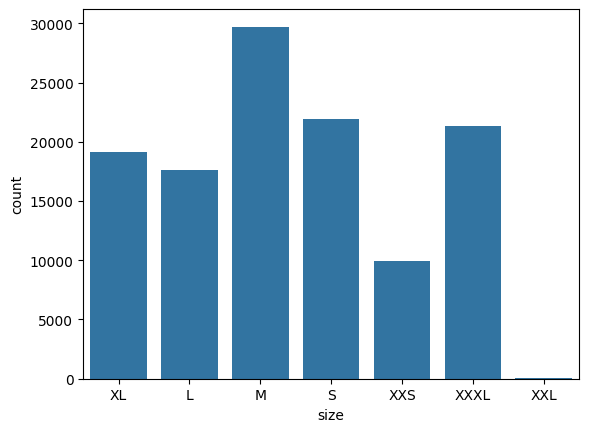

In [7]:
sns.countplot(x=df_raw['size'])

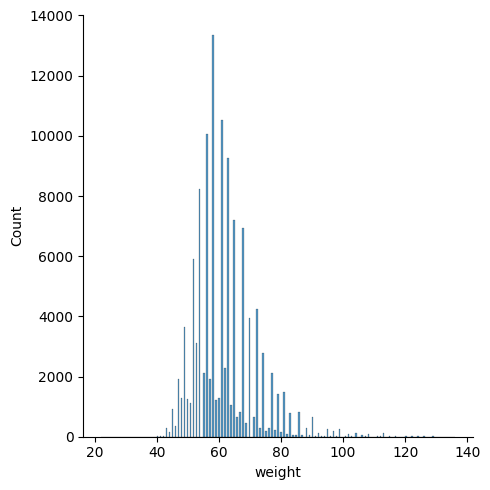

In [8]:
sns.displot(df_raw["weight"])

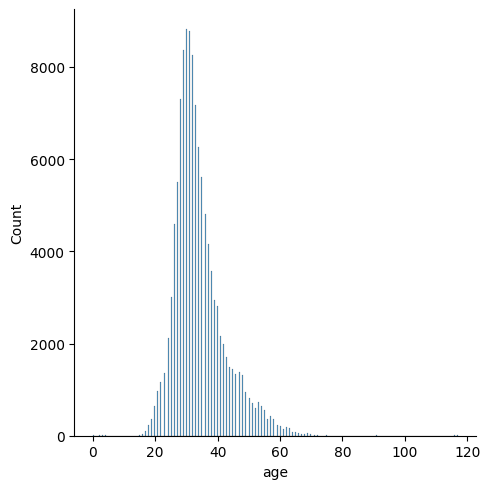

In [9]:
sns.displot(df_raw["age"])

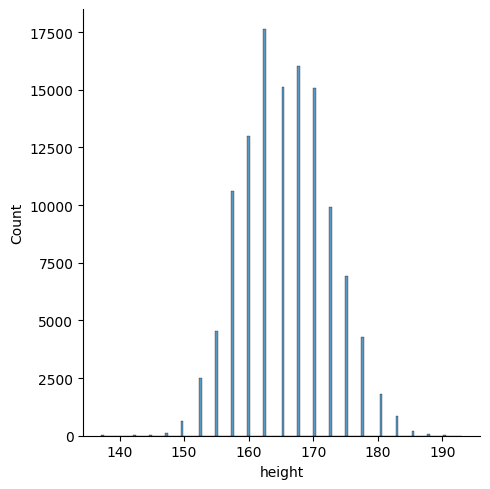

In [10]:
sns.displot(df_raw["height"])

In [11]:
#removing outliers
dfs = []
sizes = []
for size_type in df_raw['size'].unique():
    sizes.append(size_type)
    ndf = df_raw[['age','height','weight']][df_raw['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    dfs.append(zscore)
    
for i in range(len(dfs)):
    dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age']>-3) & (dfs[i]['age']<3)]
    dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height']>-3) & (dfs[i]['height']<3)]
    dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight']>-3) & (dfs[i]['weight']<3)]

for i in range(len(sizes)):
    dfs[i]['size'] = sizes[i]
df_raw = pd.concat(dfs)
df_raw.head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,XL
24,-0.713290,1.539527,1.556338,XL
25,-0.353183,-1.161765,-0.291241,XL
28,-0.473219,-1.933562,-1.399788,XL
34,0.126960,-0.775866,0.447791,XL


In [12]:
df_raw.isna().sum()

age       1678
height     547
weight    1069
size         0
dtype: int64

In [13]:
#Filling missing data
df_raw["age"] = df_raw["age"].fillna(df_raw['age'].median())
df_raw["height"] = df_raw["height"].fillna(df_raw['height'].median())
df_raw["weight"] = df_raw["weight"].fillna(df_raw['weight'].median())

In [14]:
df_raw['size'] = df_raw['size'].map({"XXS": 1,
                                    "S": 2,
                                    "M": 3,
                                    "L": 4,
                                    "XL": 5,
                                    "XXL": 6,
                                    "XXXL": 7})

In [15]:
df_raw.isna().sum()

age       0
height    0
weight    0
size      0
dtype: int64

In [16]:
df_raw

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,5
24,-0.713290,1.539527,1.556338,5
25,-0.353183,-1.161765,-0.291241,5
28,-0.473219,-1.933562,-1.399788,5
34,0.126960,-0.775866,0.447791,5
...,...,...,...,...
112707,-1.236027,-1.489537,0.318135,6
114732,-0.633300,-0.052082,1.494100,6
114803,-0.432391,-0.052082,0.514129,6
114994,0.973972,-0.052082,-0.465841,6


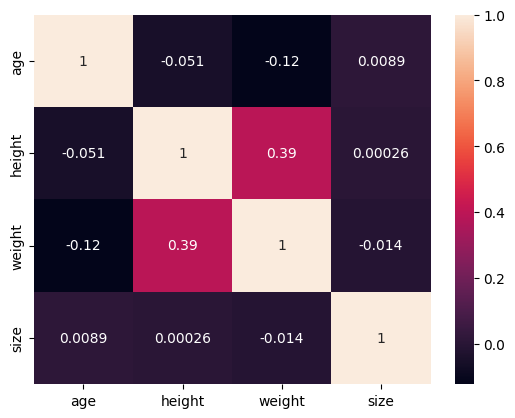

In [17]:
corr = sns.heatmap(df_raw.corr(), annot=True)

In [18]:
#features
X = df_raw.drop('size', axis=1)

#target
y = df_raw["size"]

In [19]:
X.head()

,age,height,weight
0,-0.833326,0.767729,-0.660757
24,-0.713290,1.539527,1.556338
25,-0.353183,-1.161765,-0.291241
28,-0.473219,-1.933562,-1.399788
34,0.126960,-0.775866,0.447791


In [20]:
y.head()

0     5
24    5
25    5
28    5
34    5
Name: size, dtype: int64

In [21]:
#splitting data into training set and validation set
X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.10)

In [22]:
len(X_train), len(X_test)

(107760, 11974)

In [23]:
#MLP sebelum 
from sklearn.neural_network import MLPClassifier

# Membuat objek MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

# Melatih model
mlp.fit(X_train, y_train)

# Memprediksi nilai target
y_pred = mlp.predict(X_test)

# Akurasi
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

print(classification_report(y_test, y_pred))

# Generate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 83.66%
              precision    recall  f1-score   support

           1       0.72      0.84      0.78       952
           2       0.75      0.90      0.82      2181
           3       0.85      0.92      0.89      2988
           4       0.89      0.74      0.81      1764
           5       0.93      0.79      0.85      1968
           6       0.00      0.00      0.00         6
           7       0.88      0.77      0.82      2115

    accuracy                           0.84     11974
   macro avg       0.72      0.71      0.71     11974
weighted avg       0.85      0.84      0.84     11974

[[ 802   52   29   56    0    0   13]
 [  16 1973  100   44    8    0   40]
 [  32  121 2762    2    4    0   67]
 [ 126  238   43 1302   17    0   38]
 [  89  106  149    9 1548    0   67]
 [   2    1    0    2    1    0    0]
 [  46  147  170   42   80    0 1630]]


In [24]:
#NAIVE BAYES sebelum 
from sklearn.naive_bayes import GaussianNB

# Misalkan Anda memiliki data X dan y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Inisialisasi dan melatih model Gaussian Naive Bayes
nb_model = GaussianNB()

# Melakukan training
nb_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = nb_model.predict(X_test)

# Matriks kebingungan (confusion matrix)
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,y_pred))

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy: {:.2f}%'.format(accuracy * 100))

# Laporan klasifikasi
print('\nClassification Report:')
print(classification_report(y_test,y_pred))


Confusion Matrix:
[[   0    0 1972    0    0    0   35]
 [   0    0 4202    0    0    0  111]
 [   0    0 5782    0    0    0  133]
 [   0    0 3481    0    0    0  104]
 [   0    0 3733    0    0    0   90]
 [   0    0   14    0    0    0    1]
 [   0    0 4179    0    0    0  110]]

Accuracy: 24.60%

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2007
           2       0.00      0.00      0.00      4313
           3       0.25      0.98      0.39      5915
           4       0.00      0.00      0.00      3585
           5       0.00      0.00      0.00      3823
           6       0.00      0.00      0.00        15
           7       0.19      0.03      0.05      4289

    accuracy                           0.25     23947
   macro avg       0.06      0.14      0.06     23947
weighted avg       0.09      0.25      0.11     23947



In [25]:
# Decision Tree
# Misalkan Anda memiliki data X dan y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Inisialisasi dan melatih model Decision Tree
dt_model = DecisionTreeClassifier()

# Melakukan training
dt_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = dt_model.predict(X_test)

# Matriks kebingungan (confusion matrix)
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,y_pred))

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy: {:.2f}%'.format(accuracy * 100))

# Laporan klasifikasi
print('\nClassification Report:')
print(classification_report(y_test,y_pred))


Confusion Matrix:
[[1944    0    1    1    0    0    0]
 [   0 4409    0    0    0    0    2]
 [   0    0 6022    1    0    0    3]
 [   0    0    0 3530    0    0    0]
 [   0    0    0    0 3763    0    0]
 [   2    0    0    0    0   14    1]
 [   0    5    2    1    0    0 4246]]

Accuracy: 99.92%

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1946
           2       1.00      1.00      1.00      4411
           3       1.00      1.00      1.00      6026
           4       1.00      1.00      1.00      3530
           5       1.00      1.00      1.00      3763
           6       1.00      0.82      0.90        17
           7       1.00      1.00      1.00      4254

    accuracy                           1.00     23947
   macro avg       1.00      0.97      0.99     23947
weighted avg       1.00      1.00      1.00     23947



In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Misalkan Anda memiliki data X dan y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Inisialisasi model MLP Classifier
mlp_model = MLPClassifier()

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier()

# Melakukan cross validation pada model MLP Classifier
mlp_scores = cross_val_score(mlp_model, X_train, y_train, cv=10)

# Melakukan cross validation pada model Naive Bayes
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=10)

# Melakukan cross validation pada model Decision Tree
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=10)

# Menampilkan hasil cross validation untuk masing-masing model
print("Hasil Cross Validation Model MLP Classifier: {:.2f}%".format(mlp_scores.mean() * 100))
print("Hasil Cross Validation Model Naive Bayes: {:.2f}%".format(nb_scores.mean() * 100))
print("Hasil Cross Validation Model Decision Tree: {:.2f}%".format(dt_scores.mean() * 100))

NameError: name 'train_test_split' is not defined